In [101]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import shap
import sklearn
from sklearn.model_selection import train_test_split
from treeinterpreter import treeinterpreter as ti

In [4]:
var=['s']
print(type(var))
print(isinstance(var, str))

<class 'list'>
False


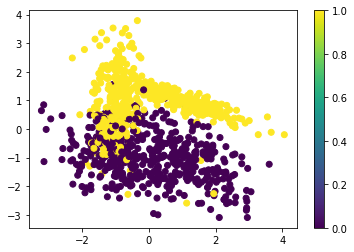

In [153]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0)
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

In [230]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X,y)

# use Kernel SHAP to explain test set predictions
#explainer = shap.KernelExplainer(model.predict_proba, X, link="identity")
#shap_values = explainer.shap_values(X, l1_reg="num_features(10)")

shap.sample(X, 1000)
explainer = shap.TreeExplainer(model, X, model_output='probability')
shap_values = explainer.shap_values(X)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X[0,:], link="identity")

 99%|===================| 1976/2000 [01:17<00:00]        

In [206]:
shap_sum = np.sum(shap_values[1], axis=1)#+explainer.expected_value[1]
prediction = model.predict_proba(X)[:,1]

print(np.amax(prediction-shap_sum))

#print(np.sum(shap_values[1], axis=1)+explainer.expected_value[1])
#print(model.predict_proba(X)[:,1])

0.5022000000000005


In [207]:
prediction, bias, contributions = ti.predict(model, X)

In [208]:
print(prediction.shape, bias.shape, contributions.shape)

(1000, 2) (1000, 2) (1000, 2, 2)


In [209]:
ti_contributions = np.sum(contributions[:,:,1], axis=1)#+bias[:,1]

In [210]:
ti_arr = contributions[:,:,1]
shp = shap_values[1]

In [211]:
print('TI :\n', ti_arr[5:15,:])
print('\nSHAP :\n', shp[5:15, :])

TI :
 [[ 0.30888742 -0.14280742]
 [-0.03104549  0.51712549]
 [-0.11496315 -0.38895685]
 [-0.10673743 -0.39718257]
 [ 0.18507305  0.14100695]
 [ 0.03696202  0.44911798]
 [-0.04954057 -0.45437943]
 [ 0.02940885 -0.44332885]
 [ 0.24920765 -0.17312765]
 [ 0.0657718   0.2603082 ]]

SHAP :
 [[ 0.27893  -0.11113 ]
 [-0.06097   0.54877 ]
 [-0.14801  -0.35419 ]
 [-0.101015 -0.401185]
 [ 0.1193    0.2085  ]
 [ 0.04547   0.44233 ]
 [-0.012505 -0.489695]
 [-0.022615 -0.389585]
 [ 0.241965 -0.164165]
 [ 0.075365  0.252435]]


In [212]:
print(np.argmax(np.absolute(ti_arr-shp), axis=0))
print(np.max(np.absolute(ti_arr-shp), axis=0))
print(np.mean(np.absolute(ti_arr-shp), axis=0))

[243 243]
[0.17176927 0.17004927]
[0.03304135 0.03315968]


In [213]:
idx = 243
print('X:', X[idx,:])
print('Prediction: ', prediction[idx,1])
print('TI: ', ti_arr[idx,:])
print('SHAP: ', shp[idx,:])

print(np.sum(ti_arr[idx,:]))

print(np.sum(ti_arr[idx,:])+bias[0,1])
print(np.sum(shp[idx,:])+explainer.expected_value[1])

X: [-0.99951629  0.30845785]
Prediction:  0.2
TI:  [-0.29974927 -0.00417073]
SHAP:  [-0.12798 -0.17422]
-0.3039199999999998
0.20000000000000023
0.2


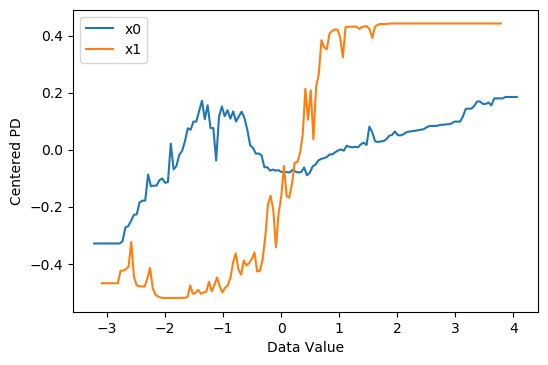

In [229]:
from sklearn.inspection import partial_dependence
pdp1, axes1 = partial_dependence(model, X, [0], grid_resolution=150, percentiles=[0,1])
pdp2, axes2 = partial_dependence(model, X, [1], grid_resolution=150, percentiles=[0,1])
fig=plt.figure(dpi=100)
plt.plot(axes1[0], pdp1[0,:]-np.mean(pdp1[0,:]), label='x0')
plt.plot(axes2[0], pdp2[0,:]-np.mean(pdp2[0,:]), label='x1')
plt.ylabel('Centered PD')
plt.xlabel('Data Value')
plt.legend()

In [216]:
values = shap.TreeExplainer(model).shap_interaction_values(X)

In [217]:
print(np.shape(values))

(2, 1000, 2, 2)


# Dependence Plot
This shows how the model depends on the given feature, and is like a
richer extenstion of the classical parital dependence plots. Vertical dispersion of the
data points represents interaction effects.

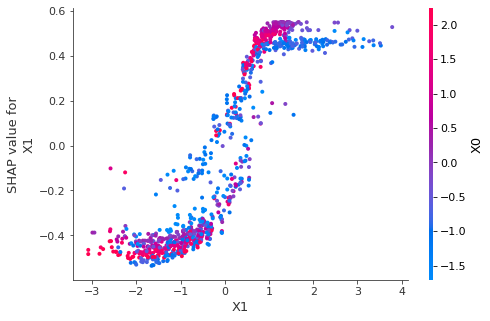

In [228]:
shap.dependence_plot(ind = 1, 
                     shap_values=shap_values[1], 
                     features=X,
                     feature_names=['X0', 'X1'],
                     interaction_index='auto')

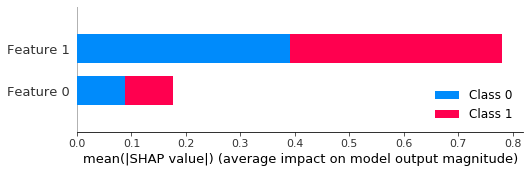

In [231]:
# summarize the effects of all the features
shap.summary_plot(shap_values)

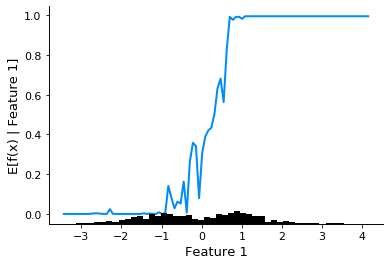

In [236]:
shap.partial_dependence_plot(ind=1,
                            model=model.predict,
                            features=X)

In [240]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value[1], shap_values[1], X)